## **Flights Data Exploration Challenge**

A significant part of a data scientist's role is to explore, analyze, and visualize data. In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading the required packages.


In [58]:
# Load packages that you'll require in this adventure
suppressPackageStartupMessages({
  library(tidyverse)
  library(summarytools)
  library(glue)
  library(patchwork)
  library(quarto)
  })



In [57]:
# install.packages("quarto")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘packrat’, ‘rsconnect’




Now, we can import the data into R and start doing some data science on it!



In [4]:
# Load and view the data
df_flights <- read_csv("https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv", show_col_types = FALSE)

df_flights %>%
  slice_head(n = 7)


Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1,2035,183,1,0
2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

-   **Year**: The year of the flight (all records are from 2013)

-   **Month**: The month of the flight

-   **DayofMonth**: The day of the month on which the flight departed

-   **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)

-   **Carrier**: The two-letter abbreviation for the airline.

-   **OriginAirportID**: A unique numeric identifier for the departure aiport

-   **OriginAirportName**: The full name of the departure airport

-   **OriginCity**: The departure airport city

-   **OriginState**: The departure airport state

-   **DestAirportID**: A unique numeric identifier for the destination aiport

-   **DestAirportName**: The full name of the destination airport

-   **DestCity**: The destination airport city

-   **DestState**: The destination airport state

-   **CRSDepTime**: The scheduled departure time

-   **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)

-   **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")

-   **CRSArrTime**: The scheduled arrival time

-   **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)

-   **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")

-   **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1.  Start by cleaning the data.

    -   Identify any null or missing data, and impute appropriate replacement values.

    -   Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

2.  Explore the cleaned data.

    -   View summary statistics for the numeric fields in the dataset.

    -   Determine the distribution of the **DepDelay** and **ArrDelay** columns.

    -   Use statistics, aggregate functions, and visualizations to answer the following questions:

        -   *What are the average (mean) departure and arrival delays?*

        -   *How do the carriers compare in terms of arrival delay performance?*

        -   *Is there a noticable difference in arrival delays for different days of the week?*

        -   *Which departure airport has the highest average departure delay?*

        -   *Do **late** departures tend to result in longer arrival delays than on-time departures?*

        -   *Which route (from origin airport to destination airport) has the most **late** arrivals?*

        -   *Which route has the highest average arrival delay?*

Sometimes, when we have a lot of columns in our data, it may difficult to get a grip of the data at first sight using `slice_head`

`glimpse` produces a transposed version where columns run down the page, and data runs across. This makes it possible to see every column in a data frame. Into the bargain, it also shows the dimension of the tibble and underlying data types of the columns.


In [5]:
# Get a glimpse of your data
df_flights %>%
  glimpse()


Rows: 271,940
Columns: 20
$ Year              <dbl> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013…
$ Month             <dbl> 9, 9, 9, 7, 5, 7, 10, 7, 10, 5, 6, 7, 8, 7, 10, 4, 1…
$ DayofMonth        <dbl> 16, 23, 7, 22, 16, 28, 6, 28, 8, 12, 9, 21, 4, 17, 2…
$ DayOfWeek         <dbl> 1, 1, 6, 1, 4, 7, 7, 7, 2, 7, 7, 7, 7, 3, 7, 7, 4, 5…
$ Carrier           <chr> "DL", "WN", "AS", "OO", "DL", "UA", "WN", "EV", "AA"…
$ OriginAirportID   <dbl> 15304, 14122, 14747, 13930, 13931, 12478, 13796, 122…
$ OriginAirportName <chr> "Tampa International", "Pittsburgh International", "…
$ OriginCity        <chr> "Tampa", "Pittsburgh", "Seattle", "Chicago", "Norfol…
$ OriginState       <chr> "FL", "PA", "WA", "IL", "VA", "NY", "CA", "DC", "IL"…
$ DestAirportID     <dbl> 12478, 13232, 11278, 11042, 10397, 14771, 12191, 145…
$ DestAirportName   <chr> "John F. Kennedy International", "Chicago Midway Int…
$ DestCity          <chr> "New York", "Chicago", "Washington", "Cleveland", "A…
$ DestState   

## Clean missing values

Once you have imported your data, it is always a good idea to clean it. Sadly, this is often chronically underestimated, yet it's a fundamental step required for the subsequent operations in data analysis.

Let's find how many null values there are for each column.


In [6]:
# Find how many null values there are for each column.
colSums(is.na(df_flights))


Year             Month        DayofMonth         DayOfWeek 
                0                 0                 0                 0 
          Carrier   OriginAirportID OriginAirportName        OriginCity 
                0                 0                 0                 0 
      OriginState     DestAirportID   DestAirportName          DestCity 
                0                 0                 0                 0 
        DestState        CRSDepTime          DepDelay          DepDel15 
                0                 0                 0              2761 
       CRSArrTime          ArrDelay          ArrDel15         Cancelled 
                0                 0                 0                 0

Hmm, looks like there are some NA (missing values) `late departure` indicators (DepDel15 column). Departures are considered late if the delay is 15 minutes or more, so let's see the delays for the ones with an NA late indicator:

**Question 1.**

Starting with `df_flights`, **select** columns `DepDelay` and `DepDel15` then **filter** to obtain rows where the value of `DepDel15` is `NA`. Assign the results in a variable name `flights_depdel`.

Fill in the placeholder `....` with the right code.

In [9]:
# Select columns DepDelay and DepDel15
# and then Filter the tibble to obtain
# observations where there is a missing value of DepDel15

flights_depdel <- df_flights %>%
  select(DepDelay, DepDel15) %>%
  filter(is.na(DepDel15))


Test your answer:



In [10]:
. <- ottr::check("tests/Question 1.R")


Excellent. You have successfully selected columns **DepDelay** and **DepDel15** and then filtered the data set to only include rows where the the value for **DepDel15** is NA.
Fantastic. Your tibble dimensions are also correct.
All tests passed!

Good job! Now, let's `glimpse` at `flights_depdel`.



In [11]:
flights_depdel %>%
  glimpse()


Rows: 2,761
Columns: 2
$ DepDelay <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ DepDel15 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


From the first few observations, it looks like the observations in `DepDel15` (a binary indicator that departure was delayed by more than 15 minutes) all have a corresponding delay of 0 in `DepDelay`(the number of minutes departure was delayed). Let's check by looking at the summary statistics for the `DepDelay` records:



In [12]:
# Get summary statistics using summary function
df_flights %>%
  filter(rowSums(is.na(.)) > 0) %>%
  select(DepDelay) %>%
  summary()


    DepDelay
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  

The min, max, and mean are all 0; so it seems that none of these were actually *late* departures.

**Question 2.**

Starting with `df_flights`, replace the missing values in the column **DepDel15** with a `0`. Assign this to a variable name `df_flights`.

Fill in the placeholder `....` with the right code.

In [13]:
# Replace missing values in DepDel15 with 0
df_flights <- df_flights %>%
  mutate(DepDel15 = 0)


Test your answer:



In [14]:
. <- ottr::check("tests/Question 2.R")


Good job! No more missing values in column DepDel15.
Fantastic. Your tibble dimensions are also correct.
All tests passed!

Good job! No missing values now. Let's take this a little further.

### **Clean outliers**

An outlier is a data point that differs significantly from other observations. Let's create a function that shows the distribution and summary statistics for a given column.


In [15]:
# Function to show summary stats and distribution for a column
show_distribution <- function(var_data, binwidth) {

  # Get summary statistics by first extracting values from the column
  min_val <- min(pull(var_data))
  max_val <- max(pull(var_data))
  mean_val <- mean(pull(var_data))
  med_val <- median(pull(var_data))
  mod_val <- statip::mfv(pull(var_data))

  # Print the stats
  stats <- glue::glue(
  "Minimum: {format(round(min_val, 2), nsmall = 2)}
   Mean: {format(round(mean_val, 2), nsmall = 2)}
   Median: {format(round(med_val, 2), nsmall = 2)}
   Mode: {format(round(mod_val, 2), nsmall = 2)}
   Maximum: {format(round(max_val, 2), nsmall = 2)}"
  )

  theme_set(theme_light())
  # Plot the histogram
  hist_gram <- ggplot(var_data) +
  geom_histogram(aes(x = pull(var_data)), binwidth = binwidth,
                 fill = "midnightblue", alpha = 0.7, boundary = 0.4) +

  # Add lines for the statistics
  geom_vline(xintercept = min_val, color = "gray33",
 linetype = "dashed", size = 1.3) +
  geom_vline(xintercept = mean_val, color = "cyan",
 linetype = "dashed", size = 1.3) +
  geom_vline(xintercept = med_val, color = "red",
 linetype = "dashed", size = 1.3) +
  geom_vline(xintercept = mod_val, color = "yellow",
 linetype = "dashed", size = 1.3) +
  geom_vline(xintercept = max_val, color = "gray33",
 linetype = "dashed", size = 1.3) +

  # Add titles and labels
  ggtitle("Data Distribution") +
  xlab("") +
  ylab("Frequency") +
  theme(plot.title = element_text(hjust = 0.5))

  # Plot the box plot
  bx_plt <- ggplot(data = var_data) +
  geom_boxplot(mapping = aes(x = pull(var_data), y = 1),
               fill = "#E69F00", color = "gray23", alpha = 0.7) +

    # Add titles and labels
  xlab("Value") +
  ylab("") +
  theme(plot.title = element_text(hjust = 0.5))


  # To return multiple outputs, use a `list`
  return(

    list(stats,
         hist_gram / bx_plt)) # End of returned outputs

} # End of function


**Question 3.** Starting with the `df_flights` data, only keep the **`DepDelay`** column. Assign this to a variable name `df_col`.

Once you have this figured out, call the function `show_distribution` with the arguments names and corresponding values as follows: `var_data = df_col` and `binwidth = 100`

From the function output, what's the distribution of **DepDelay** (the number of minutes departure was delayed)?

Fill in the placeholder `....` with the right code.

[[1]]
Minimum: -63.00
Mean: 10.35
Median: -1.00
Mode: -3.00
Maximum: 1425.00

[[2]]


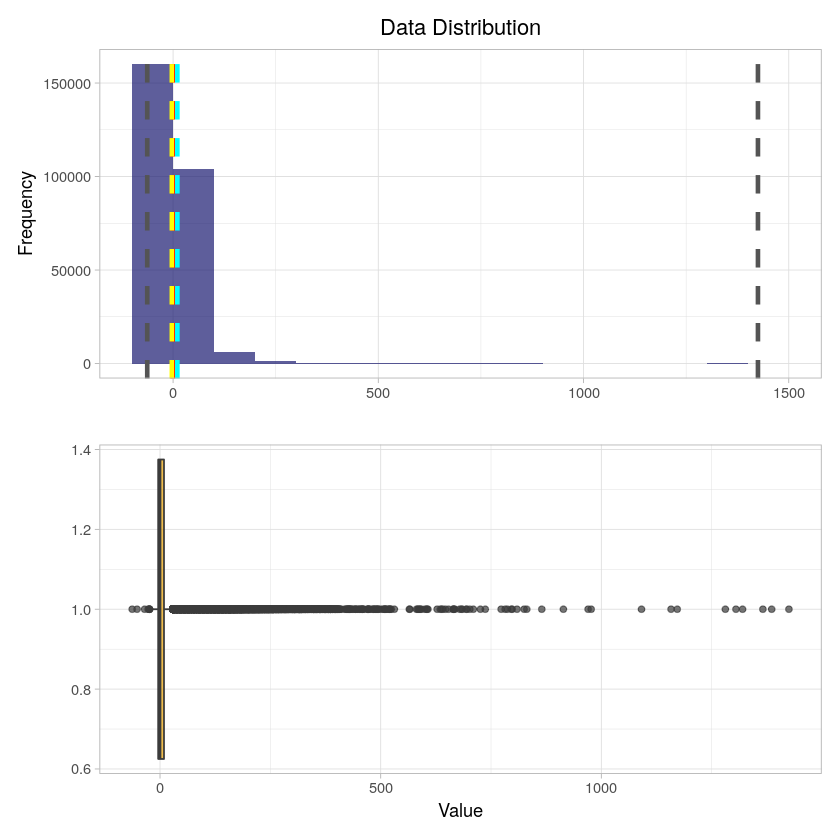

In [16]:
# Select DepDelay column
df_col <- df_flights %>%
  select(DepDelay)

# Call the function show_distribution
show_distribution(var_data = df_col, binwidth = 100)


Test your answer:



In [17]:
. <- ottr::check("tests/Question 3.R")


Fantastic! You have successfully selected column **DepDelay**
Your summary statistics are also looking great!
All tests passed!

Now, let's investigate the distribution of **ArrDelay** (the number of minutes arrival was delayed)

**Question 4.** Starting with the `df_flights` data, only keep the **`ArrDelay`** column. Assign this to a variable name `df_col`.

Once you have this figured out, call the function `show_distribution` with the arguments names and corresponding values as follows: `var_data = df_col` and `binwidth = 100` (value of the width of each bin along the X-axis)

From the function output, what's the distribution of **ArrDelay**?

Fill in the placeholder `....` with the right code.

[[1]]
Minimum: -75.00
Mean: 6.50
Median: -3.00
Mode: 0.00
Maximum: 1440.00

[[2]]


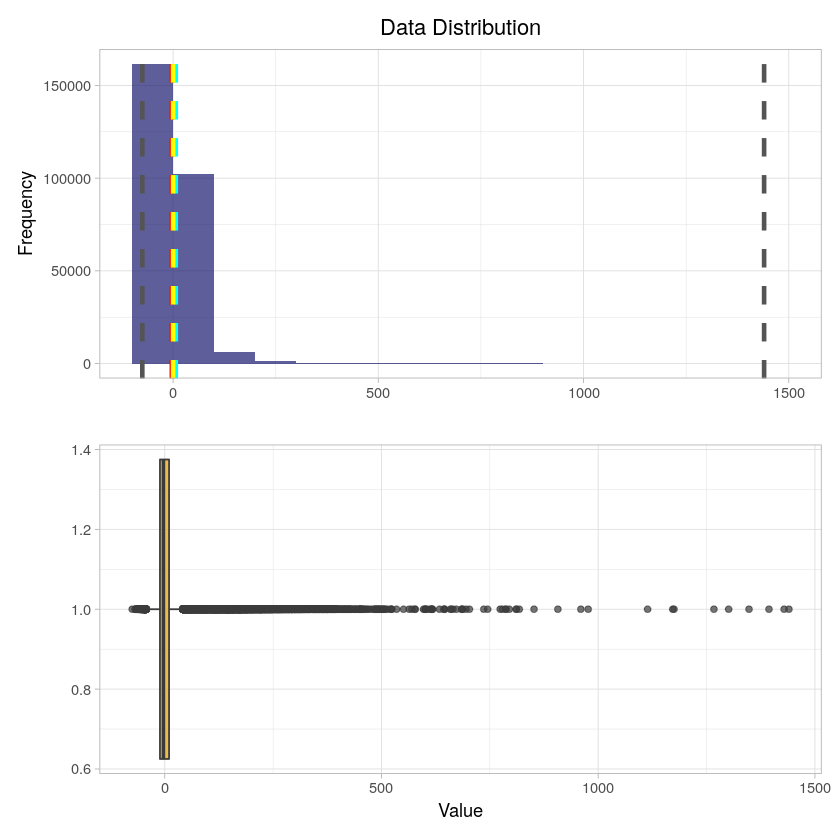

In [18]:
# Select DepDelay column
df_col <- df_flights %>%
  select(ArrDelay)

# Call the function show_distribution
show_distribution(var_data = df_col, binwidth = 100)


Test your answer:



In [19]:
. <- ottr::check("tests/Question 4.R")


Fantastic! You have successfully selected column **ArrDelay**
Your summary statistics are also looking great!
All tests passed!

From both outputs, there are outliers at the lower and upper ends of both variables. Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile. We begin with the **ArrDelay** observation.



In [20]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
# Produce quantiles corresponding to 1% and 90%
arrdelay_01pcntile <- df_flights %>%
  pull(ArrDelay) %>%
  quantile(probs = 1 / 100, names = FALSE)

arrdelay_90pcntile <- df_flights %>%
  pull(ArrDelay) %>%
  quantile(probs = 90 / 100, names = FALSE)

# Print 1st and 90th quantiles respectively
cat(arrdelay_01pcntile, "\n", arrdelay_90pcntile)


-33 
 38

Now that we have quantiles corresponding to 1% and 90%, let's filter the `df_flights` data to only include rows whose Arrival delay falls within this range.

**Question 5.** Starting with the `df_flights` data, filter to only include rows whose **ArrDelay** falls within 1st and 90th quantiles. Assign this to a variable name `df_flights`.

Fill in the placeholder `....` with the right code.

In [21]:
# Filter data to remove outliers
df_flights <- df_flights %>%
  filter(ArrDelay > -33 & ArrDelay < 38)


Test your answer:



In [22]:
. <- ottr::check("tests/Question 5.R")


Well done! You have successfully filtered the data to include observations whose Arrival Delay falls within the 1st and 90th quantiles.
All tests passed!

Now, let's do the same for `DepDelay` column.

**Question 6.** Starting with the `df_flights` data, obtain quantiles corresponding to 1% and 90%. Assign these values to the variable names `depdelay_01pcntile` and `depdelay_90pcntile` respectively.

Fill in the placeholder `....` with the right code.

In [24]:
# Trim outliers for DepDelay based on 1% and 90% percentiles
# Produce quantiles corresponding to 1% and 90%
depdelay_01pcntile <- df_flights %>%
  pull(DepDelay) %>%
  quantile(probs = 1 / 100, names = FALSE)

depdelay_90pcntile <- df_flights %>%
  pull(DepDelay) %>%
  quantile(probs = 90 / 100, names = FALSE)

# Print 1st and 90th quantiles respectively
cat(depdelay_01pcntile, "\n", depdelay_90pcntile)


-12 
 17

Test your answer:



In [25]:
. <- ottr::check("tests/Question 6.R")


That's it. You've got the correct values for the 1st and 90th percentiles.
All tests passed!

Good job!!

Now that we have quantiles corresponding to 1% and 90%, let's filter the `df_flights` data to only include rows whose Departure delay falls within this range.

**Question 7.** Starting with the `df_flights` data, filter to only include rows whose **DepDelay** falls within 1st and 90th quantiles. Assign this to a variable name `df_flights`.

Fill in the placeholder `....` with the right code.

In [26]:
# Filter data to remove outliers
df_flights <- df_flights %>%
  filter(DepDelay > -12 & DepDelay < 17)


Test your answer:



In [27]:
. <- ottr::check("tests/Question 7.R")


Well done! You have successfully filtered the data to include observations whose Departure Delay falls within the 1st and 90th quantiles.
All tests passed!

You rock!!

Now, we can check the distribution of our two variables with outliers removed.


[[1]]
Minimum: -11.00
Mean: -0.92
Median: -2.00
Mode: -3.00
Maximum: 16.00

[[2]]


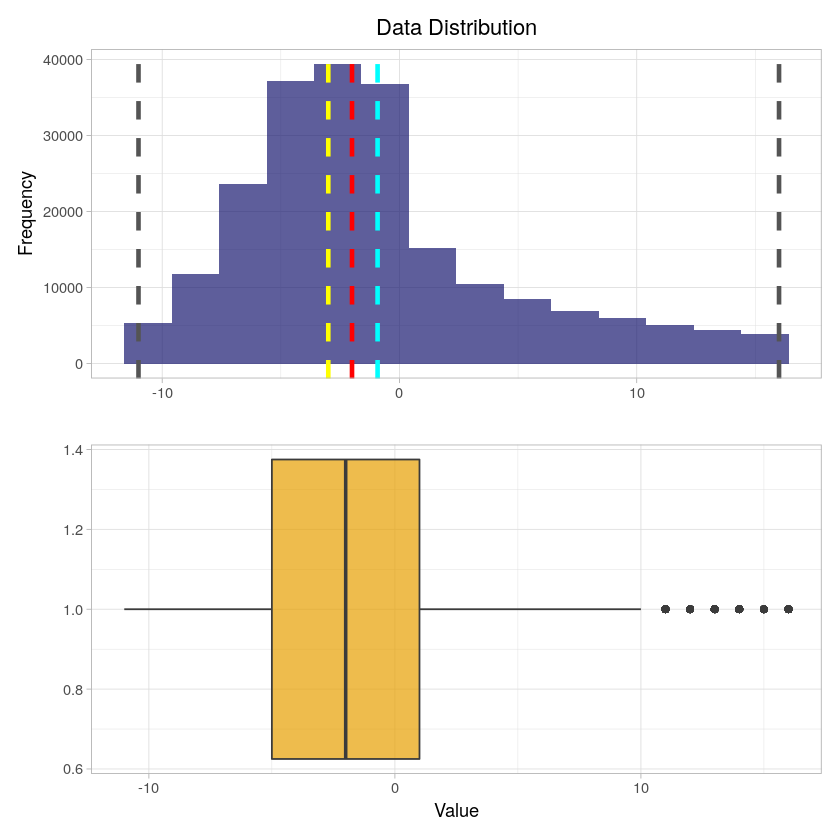

In [28]:
# Distribution of DepDelay
show_distribution(var_data = select(df_flights, DepDelay), binwidth = 2)


[[1]]
Minimum: -32.00
Mean: -5.03
Median: -6.00
Mode: 0.00
Maximum: 37.00

[[2]]


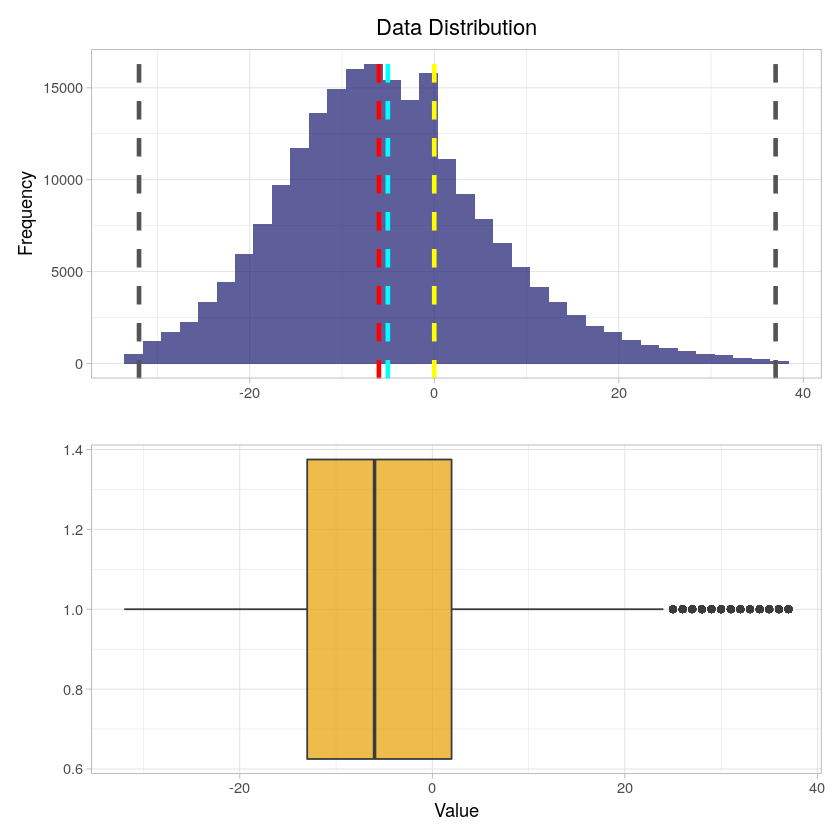

In [29]:
# Distribution of ArrDelay
show_distribution(var_data = select(df_flights, ArrDelay), binwidth = 2)


Much better!

Now that the data is all cleaned up, we can begin doing some exploratory analysis.

## **Explore the data**

Let's start with an overall view of the summary statistics for the numeric columns.


In [35]:
# Obtain common summary statistics using summarytools package
df_flights %>%
  descr(stats = "common")


unable to identify var names: .



,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
Mean,2013,7.018368e+00,1.579470e+01,3.902737e+00,12757.828,12726.276,1278.2239,-0.921692,0,1461.4066,-5.030276,6.860171e-02,1.322780e-02
Std.Dev,0,2.006398e+00,8.859118e+00,1.997744e+00,1510.059,1506.252,469.4403,5.708594,0,485.6765,11.424280,2.527762e-01,1.142492e-01
Min,2013,4.000000e+00,1.000000e+00,1.000000e+00,10140.000,10140.000,1.0000,-11.000000,0,1.0000,-32.000000,0.000000e+00,0.000000e+00
Median,2013,7.000000e+00,1.600000e+01,4.000000e+00,12892.000,12892.000,1235.0000,-2.000000,0,1445.0000,-6.000000,0.000000e+00,0.000000e+00
Max,2013,1.000000e+01,3.100000e+01,7.000000e+00,15376.000,15376.000,2359.0000,16.000000,0,2359.0000,37.000000,1.000000e+00,1.000000e+00
N.Valid,214397,2.143970e+05,2.143970e+05,2.143970e+05,214397.000,214397.000,214397.0000,214397.000000,214397,214397.0000,214397.000000,2.143970e+05,2.143970e+05
Pct.Valid,100,1.000000e+02,1.000000e+02,1.000000e+02,100.000,100.000,100.0000,100.000000,100,100.0000,100.000000,1.000000e+02,1.000000e+02


### **What are the mean departure and arrival delays?**

**Question 8.** Starting with the `df_flights` data, use `across()` within `summarize()` to find the mean across `DepDelay` and `ArrDelay` columns. Assign this to `df_delays` variable name. What are the mean delays?

Fill in the placeholder `....` with the right code.

In [36]:
# Summarise the departure and arrival delays by finding the mean
df_delays <- df_flights %>%
  summarise(across())

df_delays


Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0
2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0,2301,15,1,0
2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0,1240,-10,0,0
2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0,1507,-8,0,0
2013,7,21,7,AA,13204,Orlando International,Orlando,FL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,930,10,0,1110,-4,0,0


Test your answer:



In [37]:
. <- ottr::check("tests/Question 8.R")


Test Question 8 - 1 failed:
Let's give it another shot! Ensure that starting with **df_flights** you are creating a summary table which contains the mean across columns **DepDelay** and **ArrDelay**.
Test failed

### **How do the carriers compare in terms of arrival delay performance?**

A box plot can be a good way for graphically depicting the distribution of groups of numerical data through their quantiles. The `geom` that takes care of box plots is `geom_boxplot`


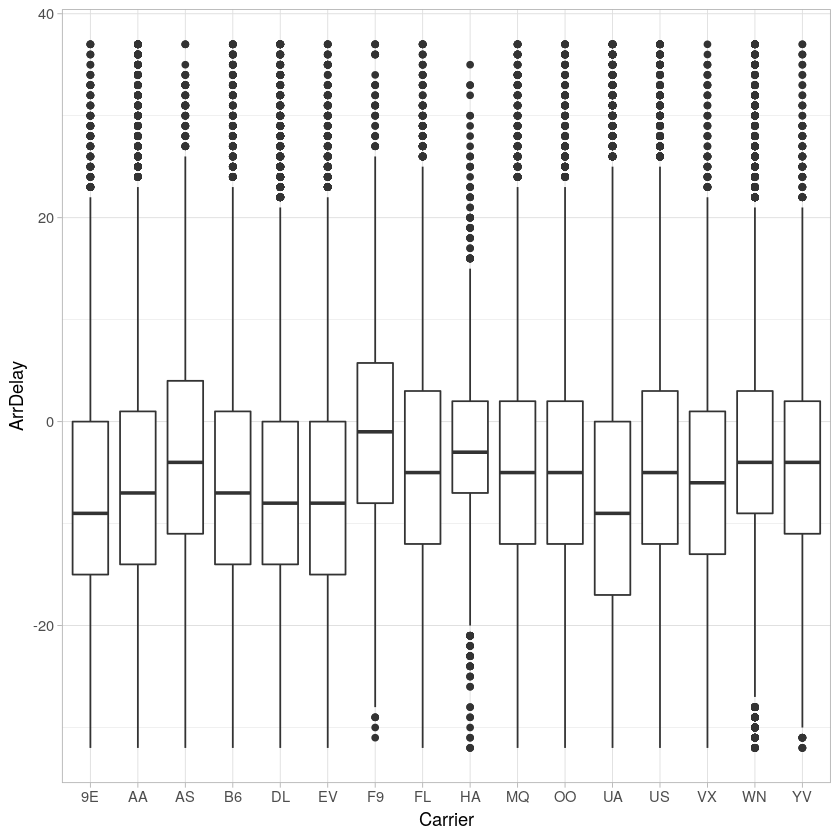

In [38]:
# Compare arrival delay across different carriers
df_flights %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = Carrier, y = ArrDelay))


### **How do the carriers compare in terms of departure delay performance?**

Let's do the same for the departure delay performance.

We can also try and rearrange the `Carrier` levels in ascending order of the delay time and sprinkle some color to the plots too.


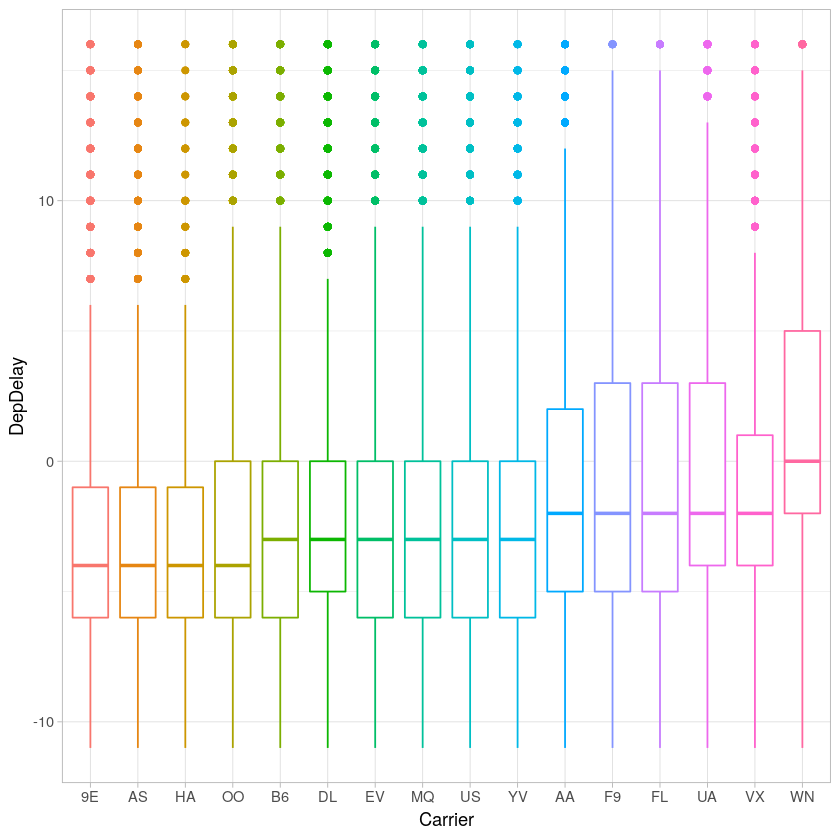

In [39]:
df_flights %>%
  mutate(Carrier = fct_reorder(Carrier, DepDelay)) %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = Carrier, y = DepDelay, color = Carrier),
  show.legend = FALSE)


Alternatively, to create the above plots, we can use `purr::map()` which allows us to apply a function to each column. See `?map` for more details.



$ArrDelay

$DepDelay


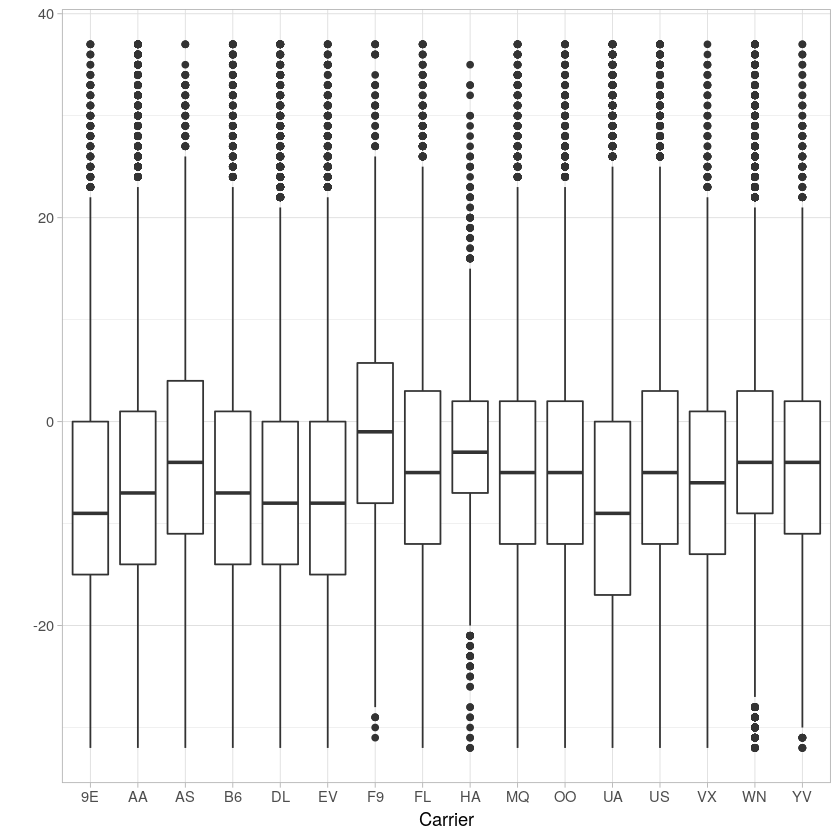

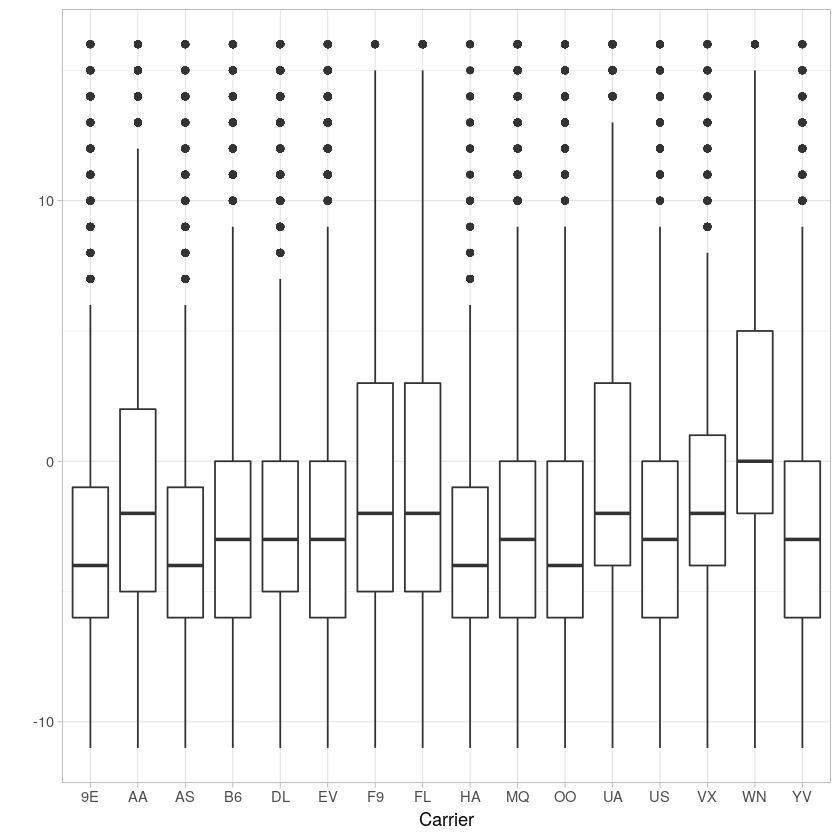

In [40]:
map(df_flights %>% select(ArrDelay, DepDelay), ~ ggplot(df_flights) +
  geom_boxplot(mapping = aes(x = Carrier, y = .x)) + ylab(""))


### **Are some days of the week more prone to arrival delays than others?**

Again, let's make use of a box plot to visually inspect the distribution of arrival delays depending on the day of the week. To successfully accomplish this, we have to first encode the week days to `categorical` variables, i.e. `factors` .


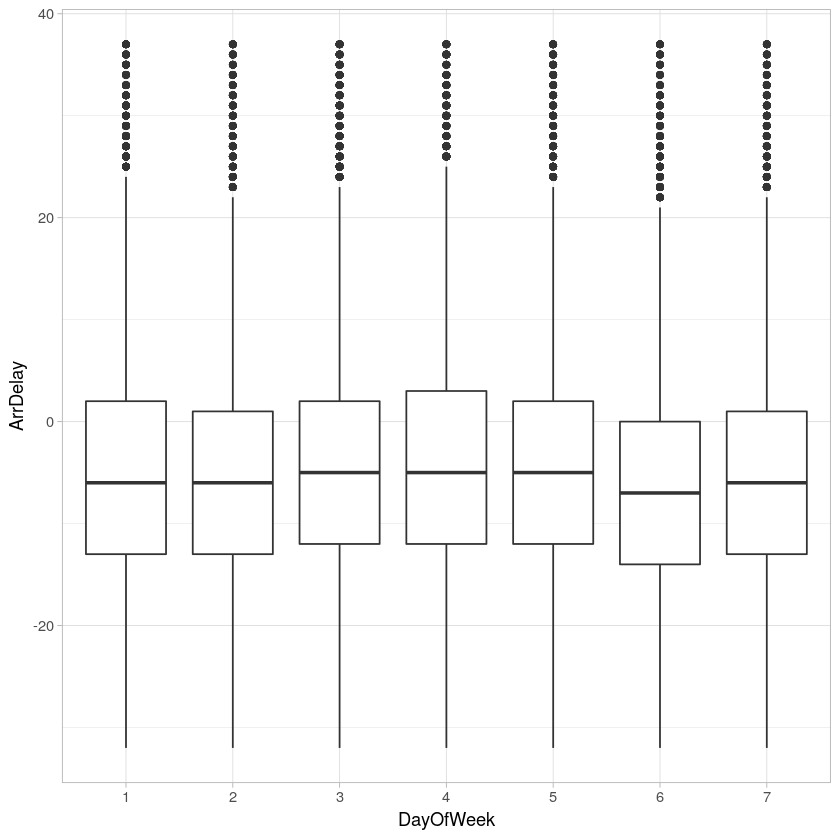

In [41]:
# Encode day of the week as a categorical and make boxplots
df_flights %>%
  mutate(DayOfWeek = factor(DayOfWeek)) %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = DayOfWeek, y = ArrDelay),
  show.legend = FALSE)


### **Are some days of the week more prone to departure delays than others?**

Now, over to you.

**Question 9.** Let's investigate whether some days of the week (x axis) are more prone to departure delays (y axis) than others. Start by encoding day of the week as a categorical variable.

Fill in the placeholder `....` with the right code.

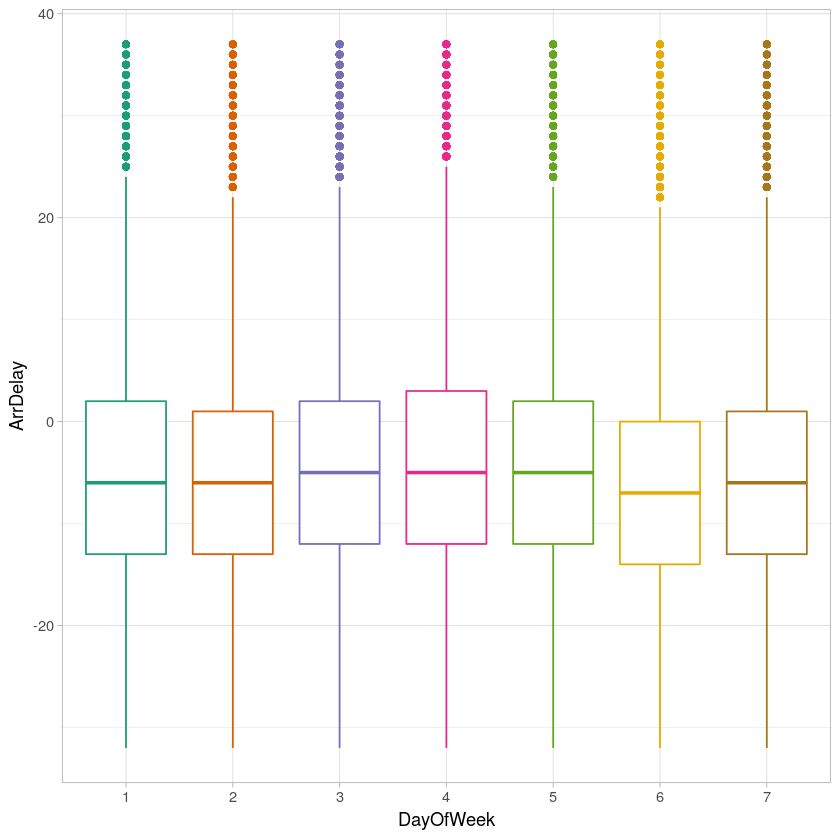

In [42]:
# Encode day of the week as a categorical variable
df_flights <- df_flights %>%
  mutate(DayOfWeek = factor(DayOfWeek))

# Make a box plot of DayOfWeek and DepDelay
dep_delay_plot <- df_flights %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = DayOfWeek, y = ArrDelay, color = DayOfWeek),
  show.legend = FALSE) +
  scale_color_brewer(palette = "Dark2")

dep_delay_plot


What can you make out of this?
Test your answer:



In [43]:
. <- ottr::check("tests/Question 9.R")


Test Question 9 - 1 passed
That's a great start! You have successfully encoded **DayOfWeek** as a categorical variable.

Test Question 9 - 2 failed:
Let's give it another try. Ensure you have mapped the x aesthetic to **DayOfWeek** and y aesthetic to **DepDelay**.
Test failed

Great progress you are having!

### **Which departure airport has the highest average departure delay?**

To answer this, we have to first **group** the data **by** `OriginAirportName` and then **summarize** the observations by the **mean** of their Departure delay `DepDelay` and then **arrange** this in **descending** order of the mean departure delays.

Let's put this into code.


In [44]:
# Use group_by %>% summarize to find airports with highest avg DepDelay
mean_departure_delays <- df_flights %>%
  group_by(OriginAirportName) %>%
  summarize(mean_dep_delay_time = mean(DepDelay)) %>%
  arrange(desc(mean_dep_delay_time))

# Print the first 7 rows
mean_departure_delays %>%
  slice_head(n = 7)


OriginAirportName,mean_dep_delay_time
<chr>,<dbl>
Chicago Midway International,2.3659599
Dallas Love Field,2.1487979
William P Hobby,1.5619266
Metropolitan Oakland International,0.9648532
Denver International,0.8072722
Baltimore/Washington International Thurgood Marshall,0.8038569
Dallas/Fort Worth International,0.6246502


Fantastic!

Let's represent this using bar plots.


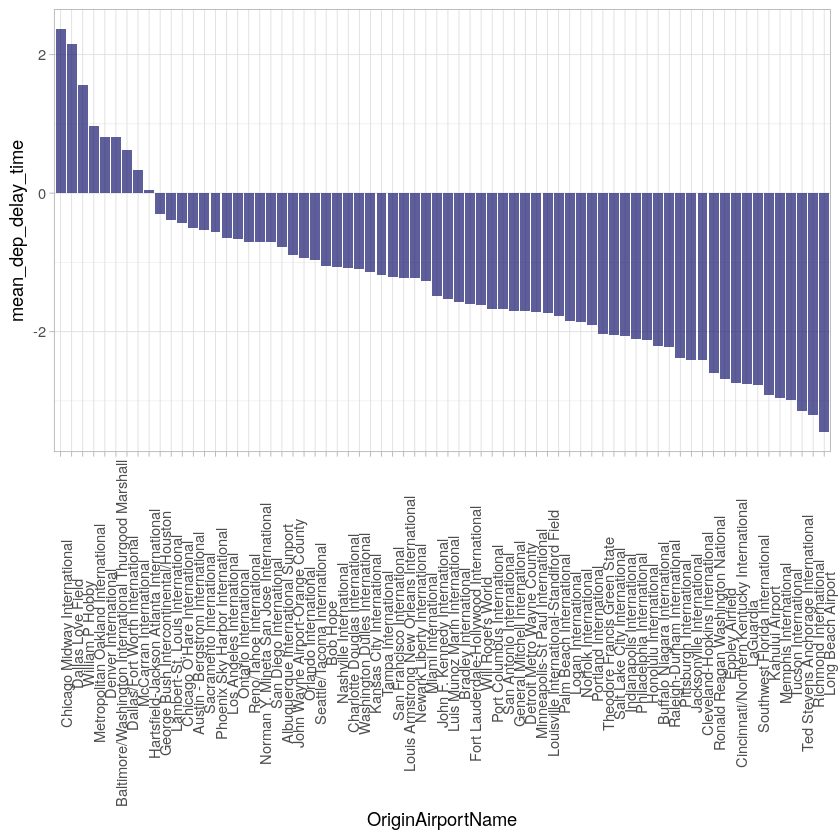

In [45]:
mean_departure_delays %>%
  # Sort factor levels in descending order of delay time
  mutate(OriginAirportName = fct_reorder(OriginAirportName,
 desc(mean_dep_delay_time))) %>%
  ggplot() +
  geom_col(mapping = aes(x = OriginAirportName, y = mean_dep_delay_time),
 fill = "midnightblue", alpha = 0.7) +
  theme(
    # Rotate X markers so we can read them
    axis.text.x = element_text(angle = 90)
  )


Could you try and guess why Chicago Airport has most departure delay time or why Long Beach has the least?

### **Do late departures tend to result in longer arrival delays than on-time departures?**

**Question 10.** Starting with the `df_flights` data, first encode `DepDel15` column (a binary indicator that departure was delayed by more than 15 minutes) as categorical.

Use a **box plot** to investigate whether late departures (x-axis) tend to result in longer arrival delays (y-axis) than on-time departures. Map the fill aesthetic to the `DepDel15` variable.

> You can colour a box plot using either the `colour` aesthetic (like in the previous exercises), or, more usefully with the `fill` aesthetic.

Fill in the placeholder `....` with the right code.

In [47]:
# Encode DepDel15 as a categorical variable
df_flights <- df_flights %>%
  mutate(DepDel15 = factor(DepDel15))

arr_delay_plot <- df_flights %>%
  ggplot() +
  geom_boxplot(mapping <- aes(x = DepDel15, y = mean_dep_delay_time, fill = DepDel15))

arr_delay_plot


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'mean_dep_delay_time' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

Does this surprise you?
Test your answer:



In [48]:
. <- ottr::check("tests/Question 10.R")


Test Question 10 - 1 passed
That's a great start! You have successfully encoded **DepDel15** as a categorical variable.

Test Question 10 - 2 failed:
Let's give it another try. Ensure you have mapped the x aesthetic to **DepDel15**, y aesthetic to **ArrDelay** and fill aesthetic to **DepDel15**.
Test failed

### **Which route (from origin airport to destination airport) has the most late arrivals?**

Finally, let's investigate travel routes. We'll start by adding a column `Route` that indicates the Origin and Destination airports.


In [49]:
# Add a "Route" column
df_flights <- df_flights %>%
  mutate(Route = paste(OriginAirportName, DestAirportName, sep = ">"))


Great! Now we can use `group_by()`, `summarize()` and `arrange()` to find the routes with the most late arrivals



In [50]:
# Make grouped summaries to find the total delay
# associated with a particular route
df_flights %>%
  group_by(Route) %>%
  summarize(ArrDel15 = sum(ArrDel15)) %>%
  arrange(desc(ArrDel15))


Route,ArrDel15
<chr>,<dbl>
San Francisco International>Los Angeles International,90
Los Angeles International>San Francisco International,69
LaGuardia>Hartsfield-Jackson Atlanta International,68
Los Angeles International>John F. Kennedy International,52
LaGuardia>Charlotte Douglas International,51
Chicago O'Hare International>Hartsfield-Jackson Atlanta International,44
LaGuardia>Chicago O'Hare International,44
Los Angeles International>McCarran International,43
John F. Kennedy International>San Francisco International,42


### **Which route has the highest average arrival delay time?**

Over to you!

**Question 11.** Starting with the `df_flights` data, group the observations by `Route` then create a summary tibble with a column name `ArrDelay` which represents the mean arrival delay time. Arrange this in descending order.

Assign your results to a variable name `df_route_arrdelay`.

Fill in the placeholder `....` with the right code.

In [54]:
# Create grouped summaries of the arrival delay time
df_route_arrdelay <- df_flights %>%
  group_by(Route) %>%
  summarize(ArrDel15 = sum(ArrDel15)) %>%
  arrange(desc(ArrDel15))


# Print the first 5 rows
df_route_arrdelay %>%
  slice_head(n = 5)


Route,ArrDel15
<chr>,<dbl>
San Francisco International>Los Angeles International,90
Los Angeles International>San Francisco International,69
LaGuardia>Hartsfield-Jackson Atlanta International,68
Los Angeles International>John F. Kennedy International,52
LaGuardia>Charlotte Douglas International,51


Test your answer:



In [55]:
. <- ottr::check("tests/Question 11.R")


Test Question 11 - 1 failed:
Almost there. Let's check the tibble dimensions again. The output tibble should have columns **Route** and **ArrDelay**.
Test failed

Test Question 11 - 2 failed:
Almost there. Ensure the tibble is arranged in descending order of their mean delay time.
Test failed

Congratulations on finishing the first challenge! We'll wrap it at that for now. Of course there are other ways to approach this challenge. So please feel free to experiment, google and share your solutions with friends.

See you in the next module where we get started with Machine Learning!

Happy Learning,

[Eric,](https://twitter.com/ericntay) Gold Microsoft Learn Student Ambassador.
